# HW 3 - Gradient Descent and Stochastic Gradient Descent

## Part A

I will first set up the equation and compute the cost function for each pair of $\lambda_1$ and $\lambda_2 $ selection within the range of [-1,3].

In [66]:
import theano
from theano import *
import theano.tensor as T
import pandas as pd
import numpy as np

import time


#set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]

#Theano Function
a = T.dscalar('a')
b = T.dscalar('b')
x = T.dvector('x')
y = T.dvector('y')
s = 0.000045*(b**2)*y - 0.000098*(a**2)*x + 0.003926*a*x*T.exp((y**2-x**2)*(a**2+b**2))
z = T.mean(s)
loss_func = function([x,y,a,b], z)


#set up the for loop
lambda1s = np.linspace(-2,3,100)
lambda2s = np.linspace(-1,8,100)
lam1, lam2 = np.meshgrid(lambda1s,lambda2s)
lamb_1 = np.ravel(lam1)
lamb_2 = np.ravel(lam2)
net_loss = np.zeros(10000)

for i in range(len(lamb_1)):
    la_1 = lamb_1[i]
    la_2 = lamb_2[i]
    result = loss_func(xi,yi,la_1,la_2)
    net_loss[i]= result

print('completed')


completed


In [67]:
#Reshaping Net Loss Function for plotting 
Z = net_loss.reshape(lam1.shape)

#Data for the specific point
lan_1 = 2.05384
lan_2 = 0
min_loss = loss_func(xi,yi,lan_1,lan_2)
print(min_loss)


-0.0006208815015659718


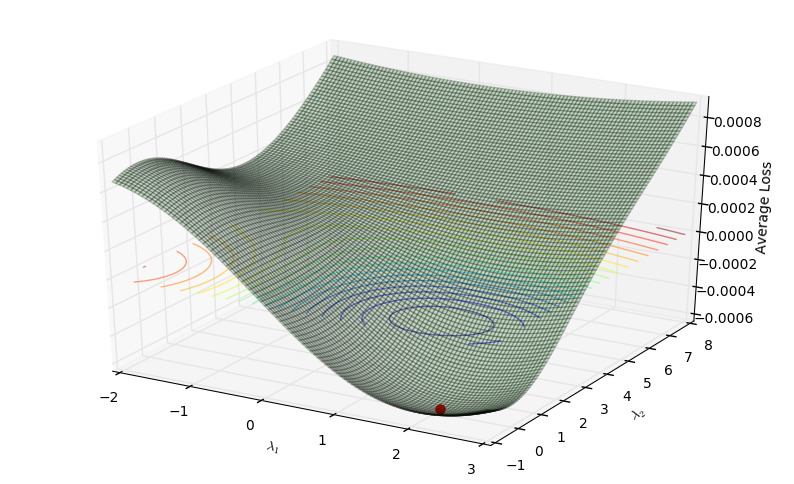

In [68]:
%matplotlib inline
#plotting the 3D charts
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(lam1, lam2, Z, rstride=1, cstride=1, color='g', alpha=0.2)
ax.contour(lam1, lam2, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.set_xlabel('$\lambda_1$')
ax.set_ylabel('$\lambda_2$')
ax.set_zlabel('Average Loss')
ax.view_init(elev=30., azim=300)
ax.plot([lan_1], [lan_2], [min_loss] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


Here we can visualize at $\lambda_1 $ = 2.05384 and $\lambda_2 $ = 0, the net loss is at a minimum.

## Part A(2) - Implemetning Gradient Descent 

Setting up the gradient descent, number of reiterations is set to 10000 using a learning rate of 0.001, stopping when the precision is 0.0001. 

Initializing with $\lambda_1$ = -1, $\lambda_2$ = 3

In [71]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]

##for 
la1 = theano.shared(value=np.float(-1), name='la1',borrow=True)
la2 = theano.shared(value=np.float(3), name='la2',borrow=True)
x = T.dvector("x")
y = T.dvector("y")

##Construct Theano expression graph
loss = (0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
cost = 1000*T.mean(loss)
gw = T.grad(cost=cost, wrt=la1)
gb = T.grad(cost=cost, wrt=la2)                 
                                                                                              
# Set Up the Training Function 
eta = 0.001 # Learning rate
train = theano.function(
          inputs=[x,y],
          outputs=[cost],
          updates=((la1, la1 - eta * gw), (la2, la2 - eta * gb)),
          name='train',allow_input_downcast=True)

n_epochs = 100000

errors = np.zeros(n_epochs)
lambda1 = []
lambda2 = []



for i in range(n_epochs):
    lambda1.append(la1.get_value())
    lambda2.append(la2.get_value())
    #remove the multiplier effect to compare the actual average cost
    errors[i] = train(xi,yi)[0]/1000  
    #stopping function
    if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
        print('Iteration stops at epoch',i)
        errors = errors[:i+1]
        break
        
print("%f seconds" % (time.time() - start_time))


Iteration stops at epoch 60645
87.851892 seconds


Visualizing the cost minimalization during the batch gradient descent:

(1.0, 60645.0, -0.00062088142176704381, 0.0003087816855951998)

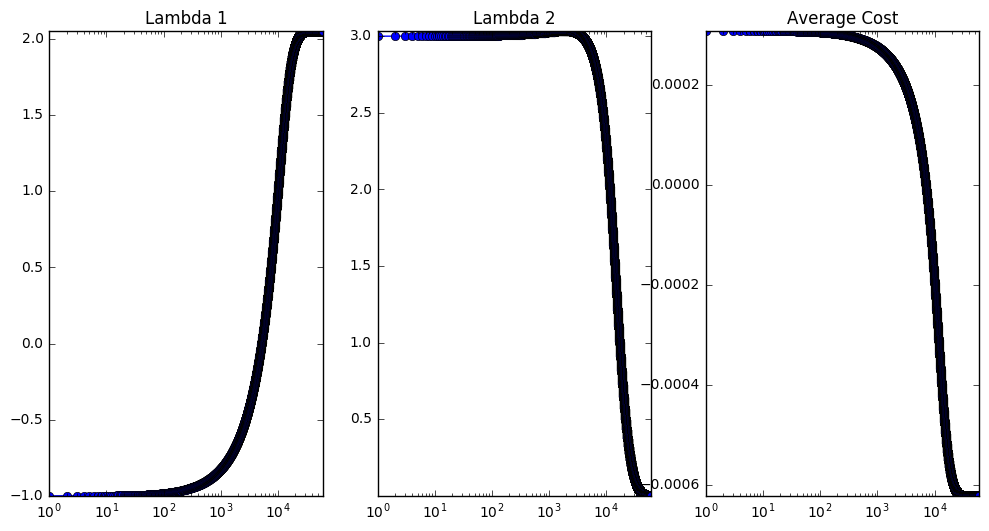

In [72]:
%matplotlib inline
#plt.plot(range(len(avg_cost)), avg_cost ,marker='o')
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 6))
axes[0].semilogx(range(len(lambda1)), lambda1,marker='o')
axes[0].set_title("Lambda 1")

axes[0].axis('tight')
axes[1].semilogx(range(len(lambda2)), lambda2,marker='o')
axes[1].set_title("Lambda 2")
axes[1].axis('tight')

axes[2].semilogx(range(len(errors)), errors,marker='o')
axes[2].set_title("Average Cost")
axes[2].axis('tight')


Visualizing the descent in 3D plot:

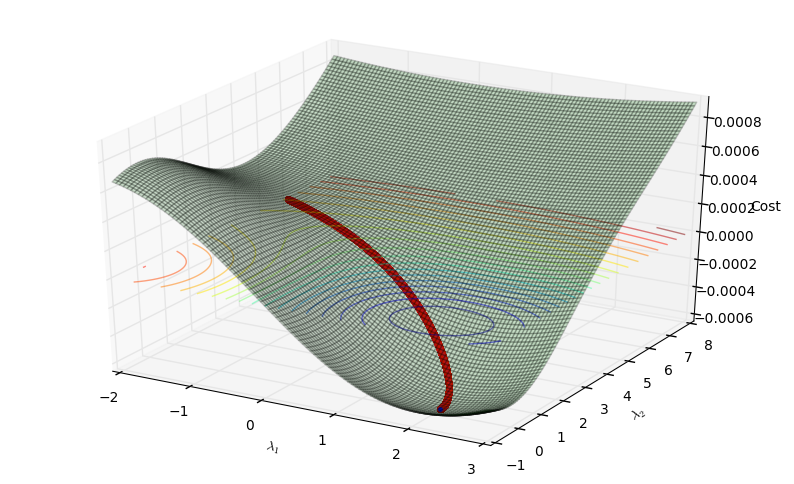

In [73]:
%matplotlib inline
#plotting the 3D charts
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(lambda1, lambda2, errors , markeredgecolor='r', marker='o', markersize=4);
ax.plot_surface(lam1, lam2, Z, rstride=1, cstride=1, color='g', alpha=0.2)
ax.contour(lam1, lam2, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.set_xlabel('$\lambda_1$')
ax.set_ylabel('$\lambda_2$')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=300)


## Part A(3) - Implemetning Stochastic Gradient Descent

In [93]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
la1 = theano.shared(value=np.float(-1), name='la1',borrow=True)
la2 = theano.shared(value=np.float(3), name='la2',borrow=True)
cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

x = T.dscalar('x')
y = T.dscalar('y')


# I have scaled the loss function with a multiple of 1000 to accelerate the descent 
loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
gw = T.grad(cost=loss, wrt=la1)
gb = T.grad(cost=loss, wrt=la2)
                                                                                              
# Set Up the Training Function with a learning rate of 0.001 
eta = 0.001 
train = theano.function(
          inputs=[x,y],
          outputs=[loss],
          updates=((la1, la1 - eta * gw), 
                   (la2, la2 - eta * gb),
                    (costsum,costsum+loss),
                    (counter,counter+1)),
          name='train',allow_input_downcast=True)

#setting up maximum number of epochs
n_epochs = 100

#initializing 
errors = []
lambda1 = []
lambda2 = []
all_cost = []
avg_cost = []

#starting 
lambda1.append(la1.get_value())
lambda2.append(la2.get_value())
print('initializing lambda at',lambda1,lambda2)

for q in range(n_epochs):
    print(q)
    xi = df[0,:]
    yi = df[1,:]
    neworder = np.random.permutation(len(xi))
    xi = xi[neworder]
    yi = yi[neworder]
        
    for i in range(len(xi)): 
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        cost_gd = train(xi[i],yi[i])
        counter_now = counter.get_value()
        costsum_now = costsum.get_value()
        avg_cost.append(costsum_now/counter_now)
        
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',q)
            print("%f seconds" % (time.time() - start_time))
            break
    else:
        continue
    break

initializing lambda at [array(-1.0)] [array(3.0)]
0
Iteration stops at epoch 0
1.364465 seconds


Visualize the change in $\lambda_1 $ and $ \lambda_2 $  and the average cost function at each epoch:

In [99]:
print(avg_cost[8000:8010])

[array([ 1.5033855]), array([ 1.56078078]), array([ 1.59519073]), array([ 1.5539739]), array([ 1.56587861]), array([ 1.57746606]), array([ 1.63399439]), array([ 1.68253321]), array([ 1.637676]), array([ 1.61834449])]


(1.0, 8609.0, 0.0009285616422012111, 4.6830758867206113)

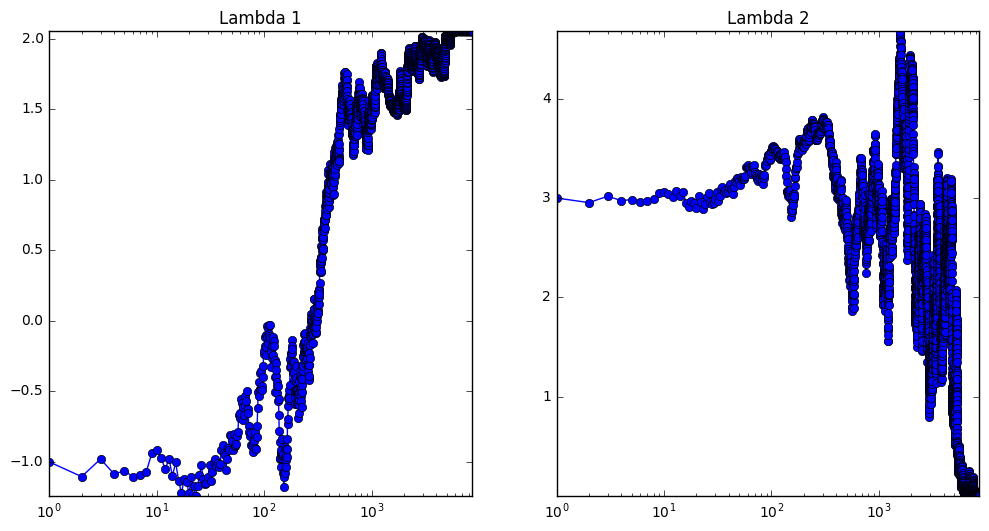

In [100]:
%matplotlib inline
#plt.plot(range(len(avg_cost)), avg_cost ,marker='o')
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
axes[0].semilogx(range(len(lambda1)), lambda1,marker='o')
axes[0].set_title("Lambda 1")

axes[0].axis('tight')
axes[1].semilogx(range(len(lambda2)), lambda2,marker='o')
axes[1].set_title("Lambda 2")
axes[1].axis('tight')


Visualizing in 3D:

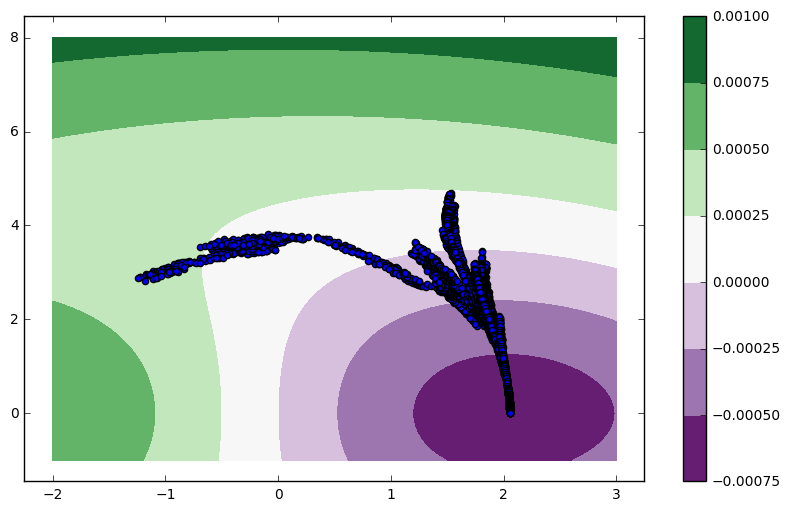

In [101]:
%matplotlib inline
#plotting the 3D charts
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab

cmap = cm.PRGn

plt.figure(figsize=(10,6))
plt.contourf(lam1, lam2, Z,cmap=cm.get_cmap(cmap, 5))
plt.colorbar()
plt.scatter(lambda1,lambda2,zorder=1)


In [103]:
print('GSD takes',len(lambda1),'iterations')

GSD takes 8610 iterations


## Part B - Compare the average time and number of iterations that GD and SGD takes 

For gradient descent, each iteration takes $87.85/60645 = 0.00144 secs $ for each iteration. 


For stochastic gradient descent, each iterations takes $ 1.3646/8610 = 0.000158 secs $ for each iteration.


SGD is faster than general GD as expected because it is faster to evaluate gradient for one point then a matrix with 16000 datapoint for each iteration. So the calculation is faster for each iteration.

For gradient descent, it takes 60645 iterations and for SGD, it takes 8610 iterations. GSD convergeds to optimal point in fewer iterations. GD is expected to take fewer iterations in fact because for each iterations, it calculates all points of the datasets to approximate the gradient before descending, which means the direction of the gradient is more precise. Each precise direction means that it takes fewer iterations to reach the minima. 

On the other hand, GSD takes a point each time to evaluate the graduate. It is less precise for the gradient compared to evaluating the whole dataset, so it may take more "reiterations" to reach the minima as that in GD. But computationally for extremely large dataset, it is more cost effective and faster. 


## Part C - Compare GSD with different learning rates

### Case (a) 
Let's use the rate of 1

In [106]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
la1 = theano.shared(value=np.float(-1), name='la1',borrow=True)
la2 = theano.shared(value=np.float(3), name='la2',borrow=True)
cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

x = T.dscalar('x')
y = T.dscalar('y')


# I have scaled the loss function with a multiple of 1000 to accelerate the descent 
loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
gw = T.grad(cost=loss, wrt=la1)
gb = T.grad(cost=loss, wrt=la2)
                                                                                              
# Set Up the Training Function with a learning rate of 0.001 
eta = 1 
train = theano.function(
          inputs=[x,y],
          outputs=[loss],
          updates=((la1, la1 - eta * gw), 
                   (la2, la2 - eta * gb),
                    (costsum,costsum+loss),
                    (counter,counter+1)),
          name='train',allow_input_downcast=True)

#setting up maximum number of epochs
n_epochs = 100

#initializing 
errors = []
lambda1 = []
lambda2 = []
all_cost = []
avg_cost = []

#starting 
lambda1.append(la1.get_value())
lambda2.append(la2.get_value())
print('initializing lambda at',lambda1,lambda2)

for q in range(n_epochs):
    #print(q)
    xi = df[0,:]
    yi = df[1,:]
    neworder = np.random.permutation(len(xi))
    xi = xi[neworder]
    yi = yi[neworder]
        
    for i in range(len(xi)): 
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        cost_gd = train(xi[i],yi[i])
        counter_now = counter.get_value()
        costsum_now = costsum.get_value()
        avg_cost.append(costsum_now/counter_now)
        
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',q)
            print("%f seconds" % (time.time() - start_time))
            break
    else:
        continue
    break
    
lambda1_a = lambda1
lambda2_a = lambda2

initializing lambda at [array(-1.0)] [array(3.0)]


### Case (b) 
Let's use the rate of 0.1

In [117]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
la1 = theano.shared(value=np.float(-1), name='la1',borrow=True)
la2 = theano.shared(value=np.float(3), name='la2',borrow=True)
cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

x = T.dscalar('x')
y = T.dscalar('y')


# I have scaled the loss function with a multiple of 1000 to accelerate the descent 
loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
gw = T.grad(cost=loss, wrt=la1)
gb = T.grad(cost=loss, wrt=la2)
                                                                                              
# Set Up the Training Function with a learning rate of 0.1 
eta = 0.1 
train = theano.function(
          inputs=[x,y],
          outputs=[loss],
          updates=((la1, la1 - eta * gw), 
                   (la2, la2 - eta * gb),
                    (costsum,costsum+loss),
                    (counter,counter+1)),
          name='train',allow_input_downcast=True)

#setting up maximum number of epochs
n_epochs = 100

#initializing 
errors = []
lambda1 = []
lambda2 = []
all_cost = []
avg_cost = []

#starting 
lambda1.append(la1.get_value())
lambda2.append(la2.get_value())
print('initializing lambda at',lambda1,lambda2)

for q in range(n_epochs):
    #print(q)
    xi = df[0,:]
    yi = df[1,:]
    neworder = np.random.permutation(len(xi))
    xi = xi[neworder]
    yi = yi[neworder]
        
    for i in range(len(xi)): 
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        cost_gd = train(xi[i],yi[i])
        counter_now = counter.get_value()
        costsum_now = costsum.get_value()
        avg_cost.append(costsum_now/counter_now)
        
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',q)
            print("%f seconds" % (time.time() - start_time))
            break
    else:
        continue
    break
    
lambda1_b = lambda1
lambda2_b = lambda2

initializing lambda at [array(-1.0)] [array(3.0)]
Iteration stops at epoch 11
14.419699 seconds


### Case (c) 
Let's use the rate of 0.001

In [112]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
la1 = theano.shared(value=np.float(-1), name='la1',borrow=True)
la2 = theano.shared(value=np.float(3), name='la2',borrow=True)
cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

x = T.dscalar('x')
y = T.dscalar('y')


# I have scaled the loss function with a multiple of 1000 to accelerate the descent 
loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
gw = T.grad(cost=loss, wrt=la1)
gb = T.grad(cost=loss, wrt=la2)
                                                                                              
# Set Up the Training Function with a learning rate of 0.1 
eta = 0.001 
train = theano.function(
          inputs=[x,y],
          outputs=[loss],
          updates=((la1, la1 - eta * gw), 
                   (la2, la2 - eta * gb),
                    (costsum,costsum+loss),
                    (counter,counter+1)),
          name='train',allow_input_downcast=True)

#setting up maximum number of epochs
n_epochs = 100

#initializing 
errors = []
lambda1 = []
lambda2 = []
all_cost = []
avg_cost = []

#starting 
lambda1.append(la1.get_value())
lambda2.append(la2.get_value())
print('initializing lambda at',lambda1,lambda2)

for q in range(n_epochs):
    #print(q)
    xi = df[0,:]
    yi = df[1,:]
    neworder = np.random.permutation(len(xi))
    xi = xi[neworder]
    yi = yi[neworder]
        
    for i in range(len(xi)): 
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        cost_gd = train(xi[i],yi[i])
        counter_now = counter.get_value()
        costsum_now = costsum.get_value()
        avg_cost.append(costsum_now/counter_now)
        
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',q)
            print("%f seconds" % (time.time() - start_time))
            break
    else:
        continue
    break
    
lambda1_c = lambda1
lambda2_c = lambda2

initializing lambda at [array(-1.0)] [array(3.0)]


### Case (d) 
Let's use the rate of 0.0001

In [113]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
la1 = theano.shared(value=np.float(-1), name='la1',borrow=True)
la2 = theano.shared(value=np.float(3), name='la2',borrow=True)
cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

x = T.dscalar('x')
y = T.dscalar('y')


# I have scaled the loss function with a multiple of 1000 to accelerate the descent 
loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
gw = T.grad(cost=loss, wrt=la1)
gb = T.grad(cost=loss, wrt=la2)
                                                                                              
# Set Up the Training Function with a learning rate of 0.1 
eta = 0.0001 
train = theano.function(
          inputs=[x,y],
          outputs=[loss],
          updates=((la1, la1 - eta * gw), 
                   (la2, la2 - eta * gb),
                    (costsum,costsum+loss),
                    (counter,counter+1)),
          name='train',allow_input_downcast=True)

#setting up maximum number of epochs
n_epochs = 100

#initializing 
errors = []
lambda1 = []
lambda2 = []
all_cost = []
avg_cost = []

#starting 
lambda1.append(la1.get_value())
lambda2.append(la2.get_value())
print('initializing lambda at',lambda1,lambda2)

for q in range(n_epochs):
    #print(q)
    xi = df[0,:]
    yi = df[1,:]
    neworder = np.random.permutation(len(xi))
    xi = xi[neworder]
    yi = yi[neworder]
        
    for i in range(len(xi)): 
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        cost_gd = train(xi[i],yi[i])
        counter_now = counter.get_value()
        costsum_now = costsum.get_value()
        avg_cost.append(costsum_now/counter_now)
        
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',q)
            print("%f seconds" % (time.time() - start_time))
            break
    else:
        continue
    break
    
lambda1_d = lambda1
lambda2_d = lambda2

initializing lambda at [array(-1.0)] [array(3.0)]
Iteration stops at epoch 29
36.126087 seconds


Compare the 4 learning rates progress in reaching minimas

(-1.69100747642281,
 2.2398719535889096,
 -0.22096191186246883,
 4.3389230408165425)

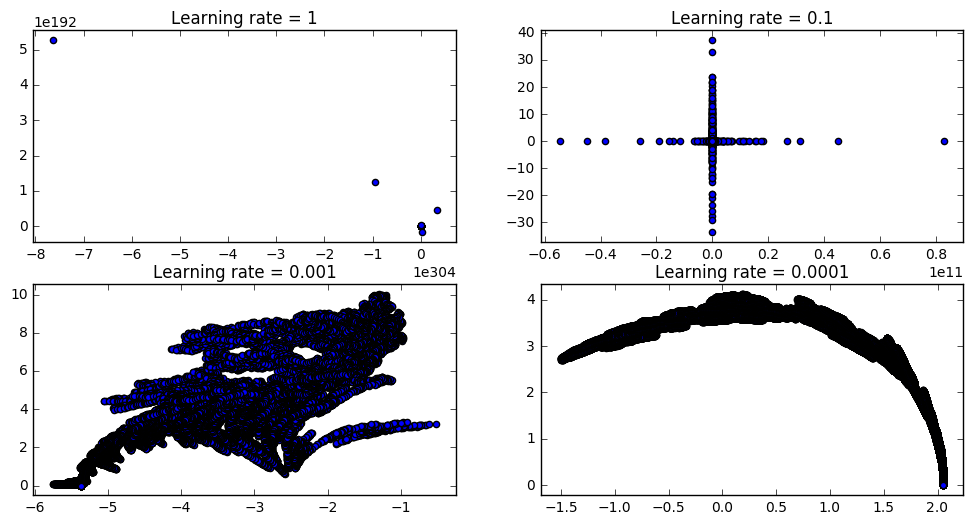

In [118]:
%matplotlib inline

#plt.plot(range(len(avg_cost)), avg_cost ,marker='o')
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 6))
#axes[0,0].contourf(lam1, lam2, Z,cmap=cm.get_cmap(cmap, 5))
axes[0,0].scatter(lambda1_a,lambda2_a,zorder=1)
axes[0,0].set_title("Learning rate = 1")
axes[0,0].axis('tight')
#axes[0,1].contourf(lam1, lam2, Z,cmap=cm.get_cmap(cmap, 5))
axes[0,1].scatter(lambda1_b,lambda2_b,zorder=1)
axes[0,1].set_title("Learning rate = 0.1")
axes[0,1].axis('tight')
#axes[1,0].contourf(lam1, lam2, Z,cmap=cm.get_cmap(cmap, 5))
axes[1,0].scatter(lambda1_c,lambda2_c,zorder=1)
axes[1,0].set_title("Learning rate = 0.001")
axes[1,0].axis('tight')
#axes[1,1].contourf(lam1, lam2, Z,cmap=cm.get_cmap(cmap, 5))
axes[1,1].scatter(lambda1_d,lambda2_d,zorder=1)
axes[1,1].set_title("Learning rate = 0.0001")
axes[1,1].axis('tight')



(1.0, 471856.0, 0.00099898368818867309, 4.1169621452658856)

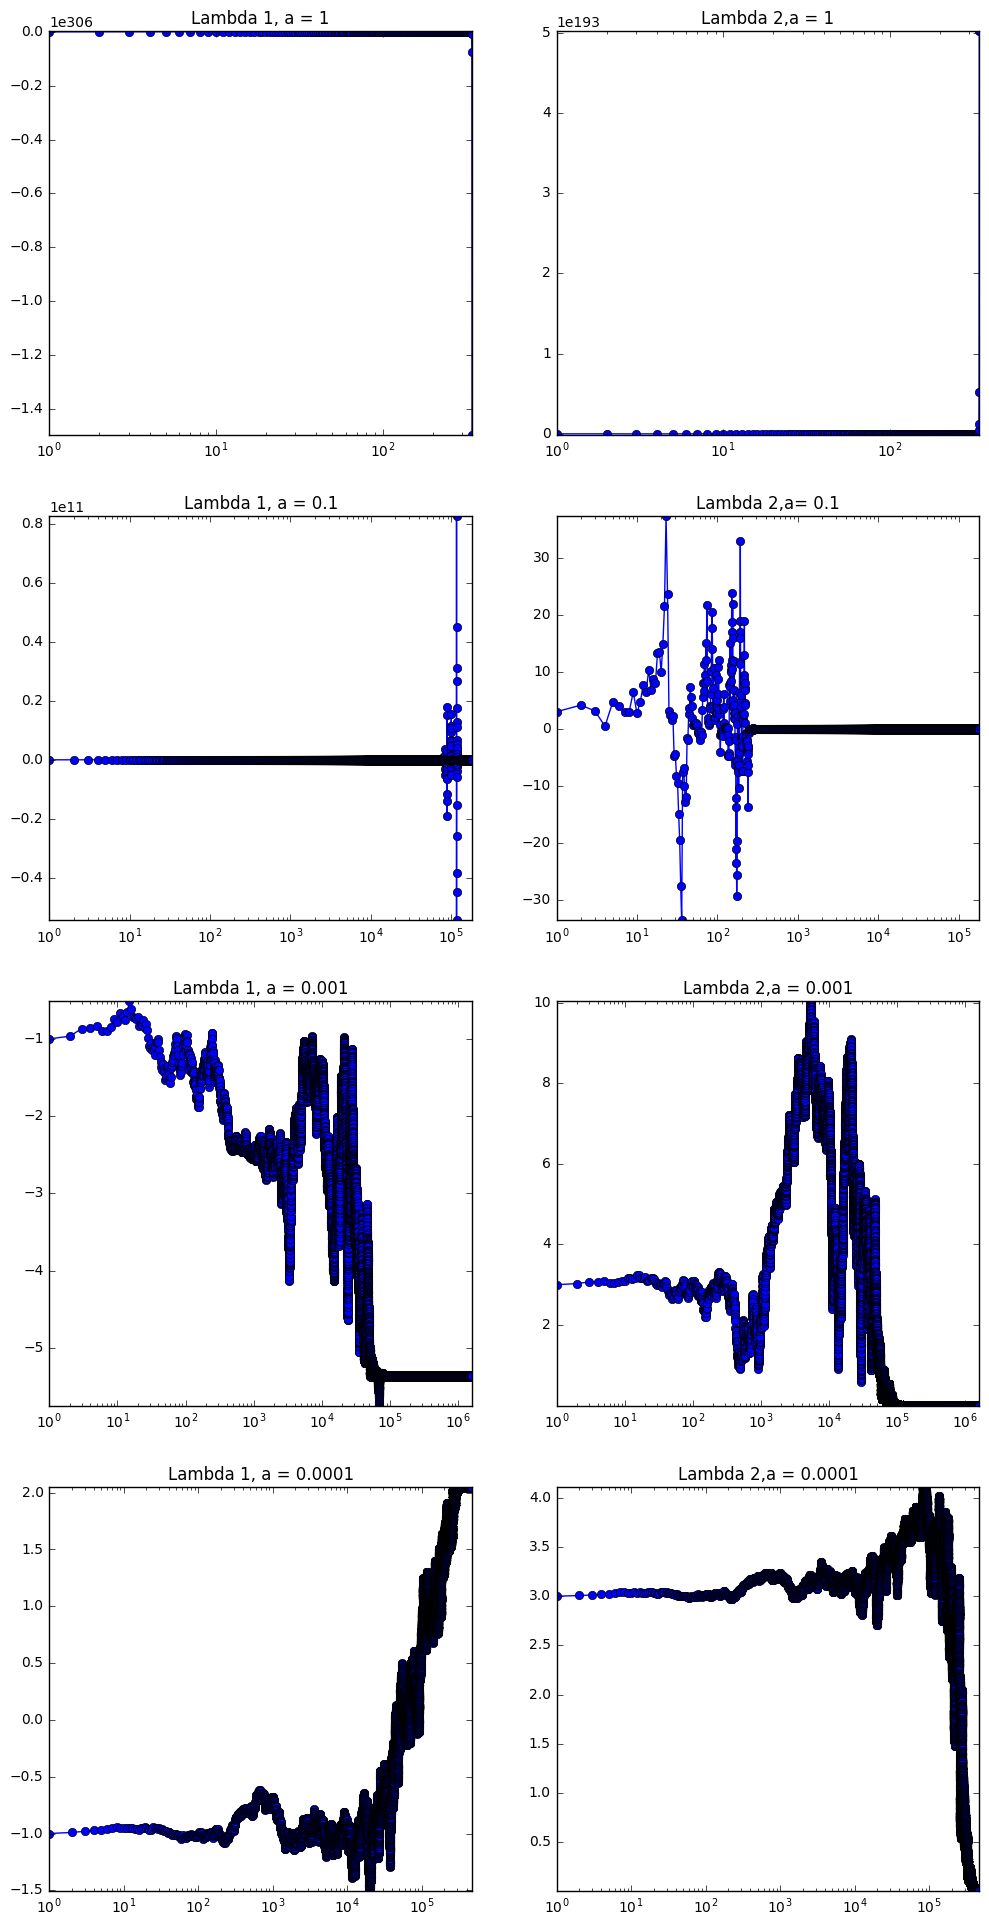

In [121]:
%matplotlib inline
#plt.plot(range(len(avg_cost)), avg_cost ,marker='o')
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(12,  24))
axes[0,0].semilogx(range(len(lambda1_a)), lambda1_a,marker='o')
axes[0,0].set_title("Lambda 1, a = 1")
axes[0,0].axis('tight')
axes[0,1].semilogx(range(len(lambda2_a)), lambda2_a,marker='o')
axes[0,1].set_title("Lambda 2,a = 1")
axes[0,1].axis('tight')
axes[1,0].semilogx(range(len(lambda1_b)), lambda1_b,marker='o')
axes[1,0].set_title("Lambda 1, a = 0.1")
axes[1,0].axis('tight')
axes[1,1].semilogx(range(len(lambda2_b)), lambda2_b,marker='o')
axes[1,1].set_title("Lambda 2,a= 0.1")
axes[1,1].axis('tight')
axes[2,0].semilogx(range(len(lambda1_c)), lambda1_c,marker='o')
axes[2,0].set_title("Lambda 1, a = 0.001")
axes[2,0].axis('tight')
axes[2,1].semilogx(range(len(lambda2_c)), lambda2_c,marker='o')
axes[2,1].set_title("Lambda 2,a = 0.001")
axes[2,1].axis('tight')
axes[3,0].semilogx(range(len(lambda1_d)), lambda1_d,marker='o')
axes[3,0].set_title("Lambda 1, a = 0.0001")
axes[3,0].axis('tight')
axes[3,1].semilogx(range(len(lambda2_d)), lambda2_d,marker='o')
axes[3,1].set_title("Lambda 2,a = 0.0001")
axes[3,1].axis('tight')


In [123]:
#looking at the minimums and maximums of the approximations:
print('lambda1_a',min(lambda1_a),max(lambda1_a))
print('lambda2_a',min(lambda2_a),max(lambda2_a))
print('lambda1_b',min(lambda1_b),max(lambda1_b))
print('lambda2_b',min(lambda2_b),max(lambda2_b))
print('lambda1_c',min(lambda1_c),max(lambda1_c))
print('lambda2_c',min(lambda2_c),max(lambda2_c))
print('lambda1_d',min(lambda1_d),max(lambda1_d))
print('lambda2_d',min(lambda2_d),max(lambda2_d))

lambda1_a -1.4975254154175088e+306 3.352784738068963e+303
lambda2_a -1.7180449861550225e+191 5.024102324578472e+193
lambda1_b -54548834890.60748 82758533449.70892
lambda2_b -33.65746889650435 37.35559848006533
lambda1_c -5.749533922227025 -0.5138356986832161
lambda2_c 3.332695519862275e-70 10.031568386952966
lambda1_d -1.504984439844199 2.0538489170102987
lambda2_d 0.000998983688188673 4.1169621452658856


We can see in the stacked plots that using the learning rate of 1, the moves for each point is so big that it just jumps from one extreme to another instead of descending gradually to a certain minima.

For learning rate of 0.1, the change in direction is less drastic but the value of is still great. And the fluctuation are still drastic but of smaller magnitude compared to learning rate of 1.

For learning rate of 0.001, we can remark the clear gradual descent from one direction to another. Even though it did not reach the minima at the number of epochs I specified, it still follows the general principles of GSD. 

For learning rate of 0.0001, the descent at the beginning is really slow until it starts kicking of the slope at the right direction. Which means that this learning rate might lead us to be stranded an area and never descend. Fortunately, it did in this trial but there's this potential.

The conclusion is that choosing the appropriate learning rate is important for the performance of the algorithm, we want to parameters to descend gradually with small step. Choosing too large of a step would make a random walk too jumpy to find the path to descend. Too small of a step means you can stay at a region and never gets out. We want to choose one that would gradually follow a smooth direction but with each step it is a random walk.
